# Ejercicio de regresion lineal

##  Uriel Antonio Alvarez Chavez 16111783

En este notebook vamos a describir paso a paso un ejercicio de prediccion, a travez de la regresion lineal, de la cantidad de ocaciones en que sera compartido un arituculo del area de Machine Learning presentado en un blog.

### Prediccion: Cantidad de ocasiones en que se compartira el articulo del Blog

Iniciamos importando librerias, ajustando y visualizando datos.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
%matplotlib inline 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm 
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')
from sklearn import linear_model 
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# se carga el archivo de datos de entrada csv como dataset de Pandas. los proviene de https://www.knugeets.com
data = pd.read_csv("./articulos de blog ml.csv")

Pandas es una libreria Python destinada al analisis de datos, que proporciona estructuras de datos flexibles que permiten trabjar con ellos de forma eficiente. Pandas ofrece las siguientes estructuras de datos: series: Son arreglos unidemensionales con indexacion (arrays con indice o etiquetados), similar a los diccionarios. Pueden generarse a partir de diccionarios o de listas. Dataframe: son estructuras de datos similares a las tables de base de datos relaciones con SQL. Panel, Panel4d y Panel1ND: Son estructuras de datos que permiten trabjar con mas de dos dimensiones.

In [3]:
# Revismaos la dimension (Registros X columnas) que contiene 
data.shape

(161, 8)

In [4]:
#Se puede revisar los primeros registros para darnos una idea de los datos 
data.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


Vemos que algunos atributos (columnas) tienen valores nulos(NaN): por ejemplo el atributo url

En este caso el atributo Sheres sera la salida, es decir el valor Y del modelo de regresion lineal. Por lo cual sera el valor que deseamos predecir. 

In [5]:
#Se realiza una estadistica descriptiva para tener conocimiento inicial de los datos mediante:
data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


Se observa que, por ejmplo la media del atributo Word count (Cantidad de palabras) es 1808.26 
Que el articulo mas pequeño contiene 250 palabras y el mas grande 8401 palabras ¿. 
Y respecto a cuanto se ha compartido un articulo (#Shares), existe los que nunca se han compartido (0veces) y el o los mas recurrentes con 350000 ocaciones (muy popular!) 

### Visualización General 

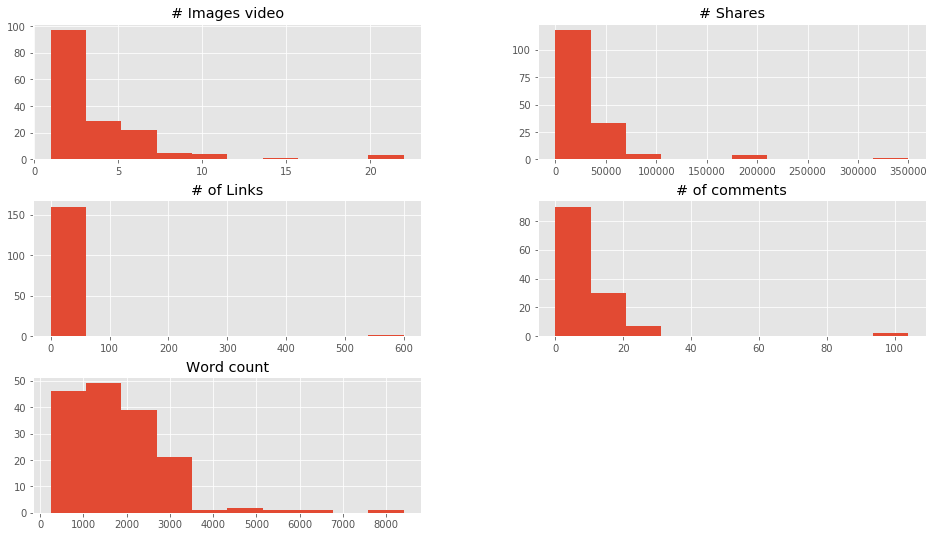

In [6]:
#Se visualiza los atributos de entrada mediante histogramas y barras (Cuantitativas y cualitativas)
data.drop(['Title','url','Elapsed days'],1).hist()
plt.show()

Las graficas anteriores comunican entre que valores se concenctran la mayoria de los registros, seguidamente se filtran los datos por cantidad de palabras dejando los registros con menos de 3500 palabras y tambien por cantidad de compartidos con menos a 80. 

### Se puede visualizar por ejemplo cantidad de palabras vs compartidos

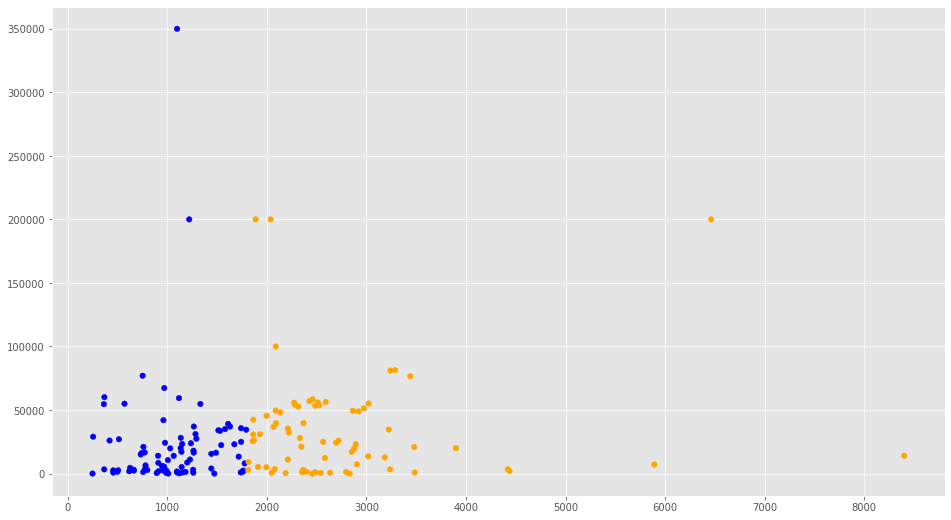

In [7]:
# Visualizar datos de entrada 
colores = ['orange','blue']
tamanios = [30,60]

f1 = data['Word count'].values
f2 = data['# Shares'].values

#Pintamos en dos colores los puntos por debajo de la media de cantidad de palabras 
asignar=[]
for index, row in data.iterrows():
    if(row['Word count'] > 1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
        
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

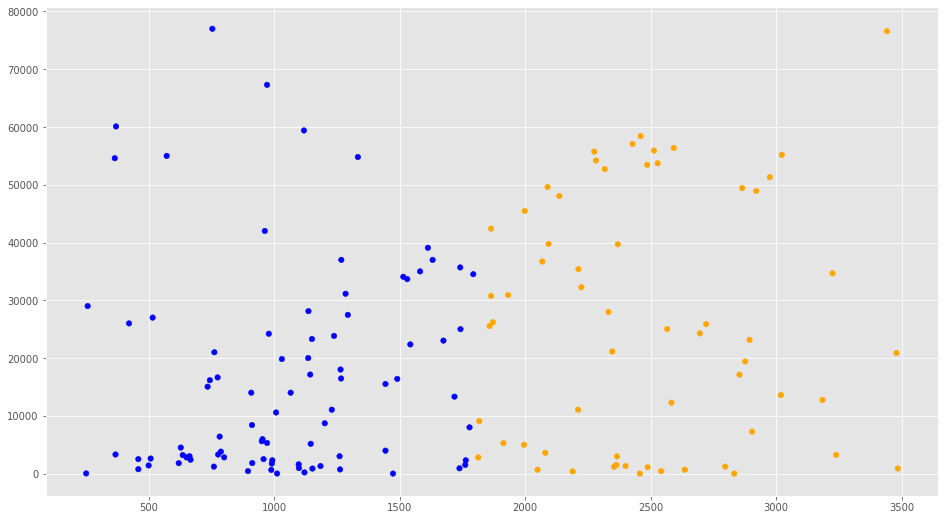

In [8]:
# VISUALIZAR los datos en la zona donde se concentran más los puntos
# esto es en el eje X: entre 0 y 3.500
# y en el eje Y: entre 0 y 80.000
filtered_data = data[(data['Word count'] <= 3500) & (data['# Shares'] <= 80000)]

f1 = filtered_data['Word count'].values
f2 = filtered_data['# Shares'].values

# Pintar en colores los puntos por debajo y por encima de la media de Cantidad de Palabras
asignar=[]
for index, row in filtered_data.iterrows():
    if(row['Word count']>1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()


## Regrecion lineal Simple (1 atributo con Python y SKLearn)


In [10]:
#se asigna el atributo de entrada X para entrenamiento y las etiquetas Y 
dataX=filtered_data[['Word count']]

X_train = np.array(dataX)
Y_train=filtered_data['# Shares'].values


In [11]:
# se genera el objeto de regresion lineal
regr = linear_model.LinearRegression()

#se entre el modelo
regr.fit(X_train, Y_train)

# se realizan las predicciones
y_pred = regr.predict(X_train)

# se revisa los coeficientes obtenidos, en este caso sera la tangente
print('coeficientes: \n', regr.coef_)
# este es el valor donde corta el eje Y (en x=0)
print('Termino independiente: \n', regr.intercept_)
# error de cuadrado medio
print('Media del error cuadrado %.2f' %mean_squared_error(Y_train, y_pred))
# puntaje de varianza. El mejor puntaje es 1.0
print('Puntaje de varianza: %2.f' % r2_score(Y_train, y_pred))

coeficientes: 
 [5.69765366]
Termino independiente: 
 11200.303223074163
Media del error cuadrado 372888728.34
Puntaje de varianza:  0


### Visualizacion de la recta obtenida

de la ecuacion de la recta y=mx+b la pendiente "m" es el coeficiente 5.69765366 y el termino independiente "b" es 11200.303223074163. Existe un error cuadratico grande; por lo cual este modelo no es el mas adecuado. Pero estamos aprendiendo el funcionamiento del algoritmo, lo que resulta imporrtante por el momento. esto lo vemos reflejado en el puntaje de varianza el cual debe ser cerca a 1.0

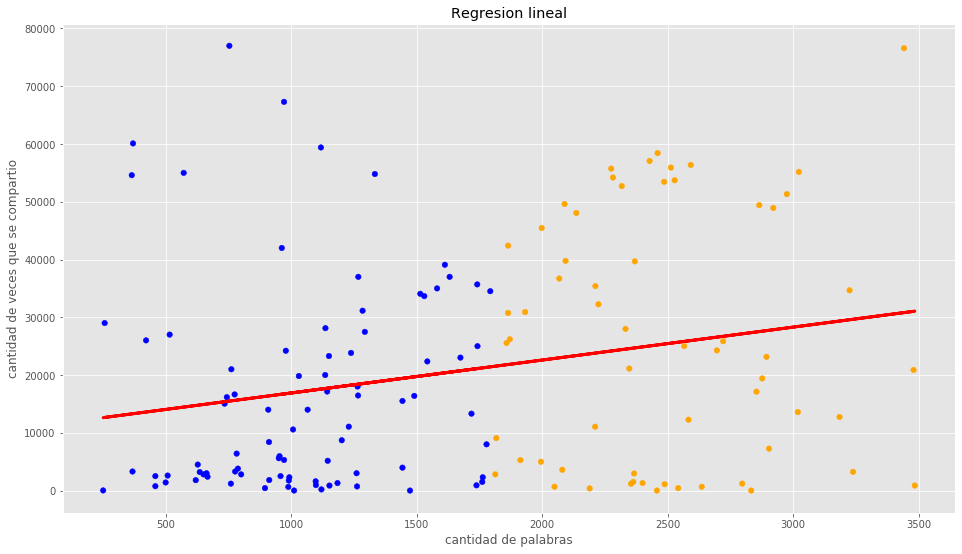

In [12]:
plt.scatter(X_train[:,0], Y_train, c=asignar, s=tamanios[0])
plt.plot(X_train[:,0], y_pred, color='red', linewidth=3)
plt.xlabel('cantidad de palabras')
plt.ylabel('cantidad de veces que se compartio')
plt.title('Regresion lineal')
plt.show()

## Prediccion


In [13]:
#predecir 
# cuantos "shares " se obtendra por un articulo de 2000 palabras
y_dosMil = regr.predict([[2000]])
print('cantidad predecida:' , int(y_dosMil))

cantidad predecida: 22595


Devuelve una prediccion de 25595 "shares" para un articulo de 2000 palabras. como podemos mejorar el modelo?

In [15]:
# se pudiera mejorar el modelo, con una dimension mas
# para poder graficar en 3D, se incluye un atributo extra que son la union de enlaces, comentarios e imagenes.
union=(filtered_data["# of Links"]+filtered_data['# of comments'].fillna(0)+ filtered_data['# Images video'])
dataX2= pd.DataFrame()
dataX2["Word count"]= filtered_data["Word count"]
dataX2["union"]= union
XY_train = np.array(dataX2)
z_train= filtered_data['# Shares'].values

In [17]:
# se genera un nuevo objeto de regresion lineal
regr2= linear_model.LinearRegression()

# se entra el modelo, esta vez, con 2 dimensiones
regr2.fit(XY_train, z_train)

#se predice con los puntos sobre el plano hallado
z_pred = regr2.predict(XY_train)
#los coeficientes
print('coeficientes: \n', regr2.coef_)
#media del error cuadrado
print('MEdia del error cuadrado %.2f' % mean_squared_error(z_train, z_pred))
# se evalua el puntaje de varianza (sinedo 1.0 el mejor posible)
print ('puntaje de varianza: %.2f' % r2_score(z_train, z_pred))


coeficientes: 
 [   6.63216324 -483.40753769]
MEdia del error cuadrado 352122816.48
puntaje de varianza: 0.11


### Se vizualiza en 3D

Text(0.5, 0.92, 'regresion lineal con multiples atributos')

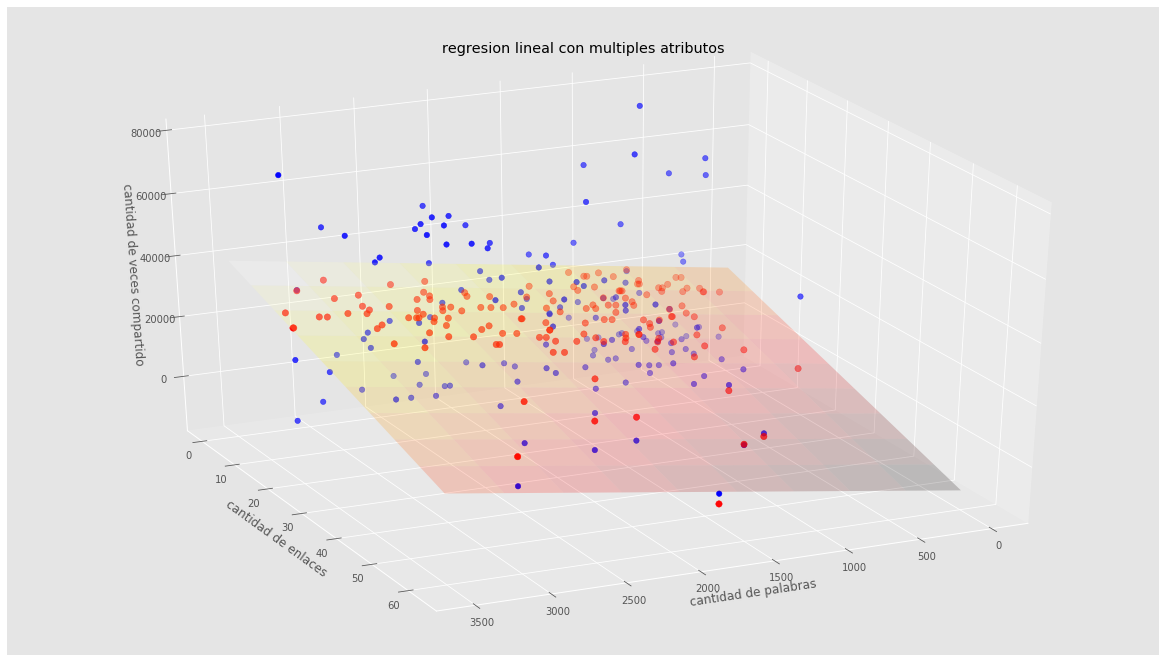

In [18]:
fig = plt.figure()
ax= Axes3D(fig)
# se genera una malla, sobre la cual se grafica el plano
xx, yy= np.meshgrid(np.linspace(0,3500,num =10),np.linspace(0,60, num=10))

# se calcua los valores del plano para los puntos x e y
nuevoX= (regr2.coef_[0]* xx)
nuevoY= (regr2.coef_[1]* yy)

# al igual que los correspondientes valores para z. Se debe sumar el punto de intercepcion
z= (nuevoX + nuevoY + regr2.intercept_)

# se grafica el plano
ax.plot_surface(xx,yy,z,alpha=0.2,cmap='hot')

# en azul los puntos en 3D
ax.scatter(XY_train[:,0], XY_train[:,1], z_train, c='blue', s=30)
ax.scatter(XY_train[:,0], XY_train[:,1], z_pred, c='red', s=40)

#con esto se situa la camara con la que se visualiza
ax.view_init(elev=30., azim=65)
ax.set_xlabel('cantidad de palabras')
ax.set_ylabel('cantidad de enlaces')
ax.set_zlabel('cantidad de veces compartido')
ax.set_title('regresion lineal con multiples atributos')